# Matplotlib  


## Matplotlibとは  

グラフを描画するライブラリ  

## 参考  

- [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)  



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.colors
import matplotlib.animation
from IPython.display import HTML
import japanize_matplotlib


---

## グラフを作成  

- `plot()`：データを図表上に示す  
  引数が1つの場合はY軸と判断、X軸は`[0, 1, 2, 3 …]`の値で自動生成  


- `show()`：無くても描画できる  
  【理由】Notebook(Ipython)が、処理終了時点の設定値で描画してくれる(通常は書かないと描画されない)  

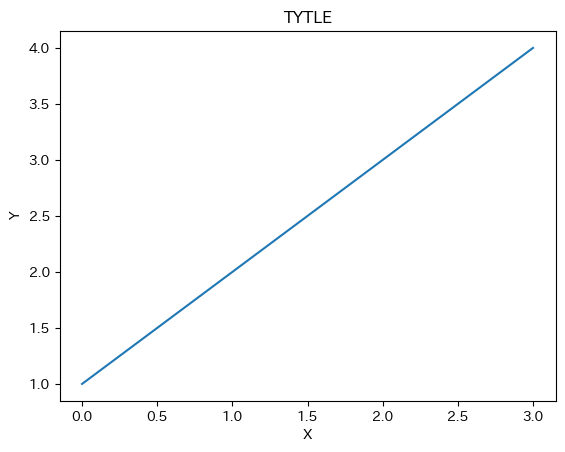

In [2]:
plt.plot([1, 2, 3, 4])
plt.title('TYTLE')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

- `plot(X軸, Y軸)`  

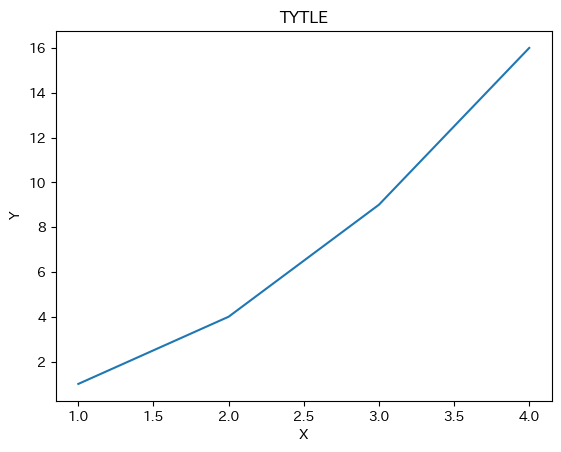

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title('TYTLE')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

- Yの値を計算  
  - Xの値はNumpyで生成  
  - リスト(`[0,1,2,3,4]`)やタプル(`(0,1,2,3,4)`)はエラー  

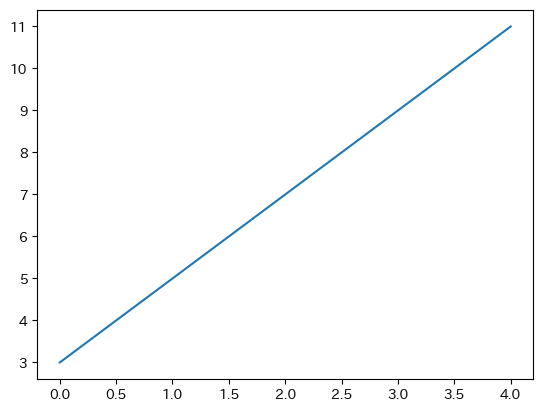

In [4]:
#x = np.array([0,1,2,3,4])
x = np.arange(0,5)
y = 2 * x + 3
plt.plot(x, y)

- `vline()`：縦線  

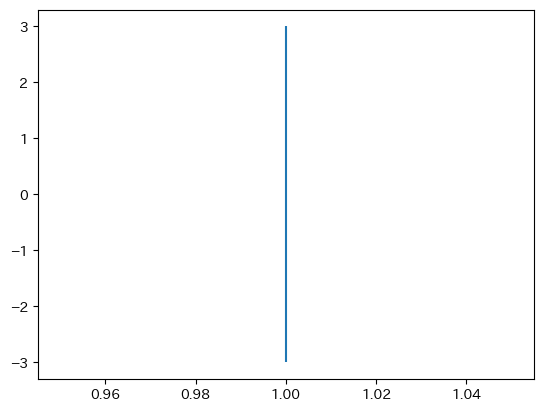

In [5]:
ymin, ymax = -3, 3
plt.vlines(1, ymin, ymax)

- `hline()`：横線  

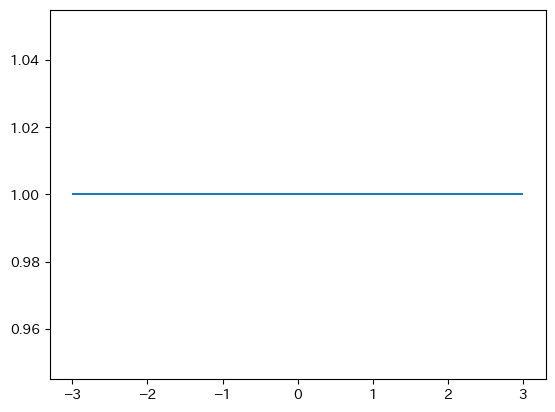

In [6]:
xmin, xmax = -3, 3
plt.hlines(1, xmin, xmax)


---

## グラフのフォーマット  

- 線グラフのデフォルト値は`b-`：青色の直線 → `ro`：赤色の点に変更  
- `grid()`：グリッドを表示  

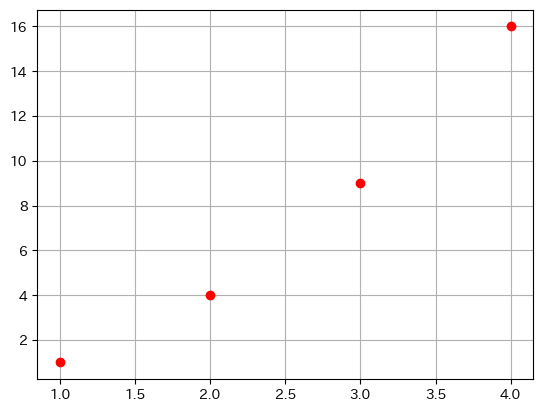

In [7]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.grid()

- 太線：`linewidth`を指定  

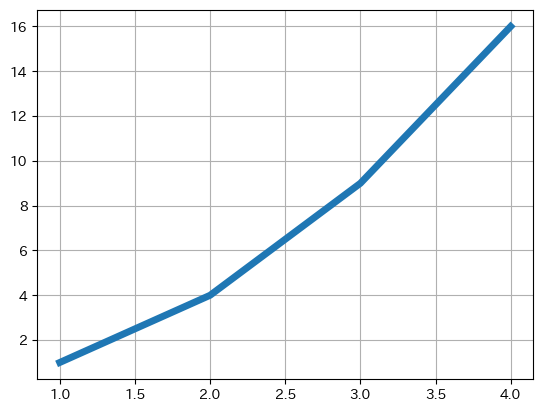

In [8]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], linewidth=5.0)
plt.grid()

- 線の透明度：`alpha` → 0～1の範囲で指定  

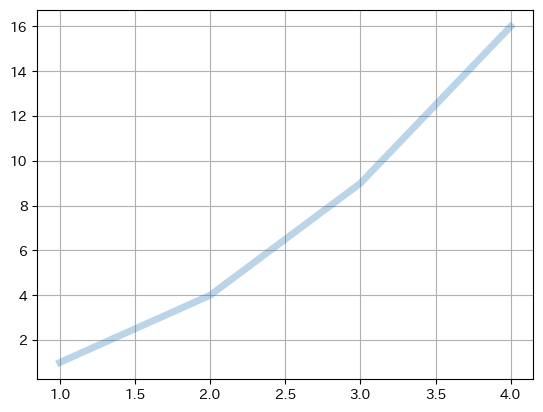

In [9]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], linewidth=5.0, alpha=0.3)
plt.grid()

- 線毎に色を変更  

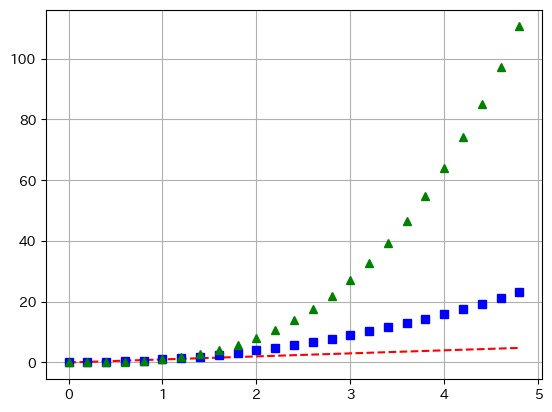

In [10]:
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.grid()

- `legend()`：凡例を表示  

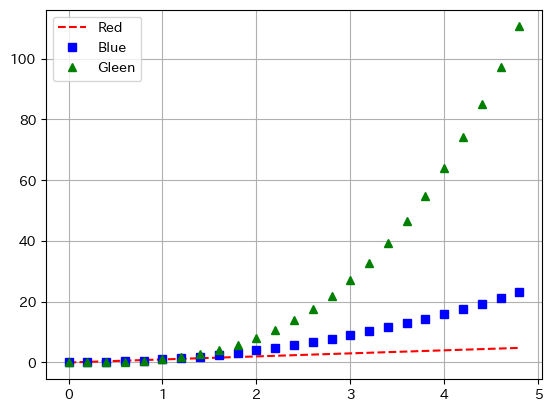

In [11]:
t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'r--', label='Red')
plt.plot(t, t**2, 'bs', label='Blue')
plt.plot(t, t**3, 'g^', label='Gleen')
plt.legend(loc='best')
plt.grid()

- X軸・Y軸の開始位置を調整  
  - `axis(X軸開始,X軸終了,Y軸開始,Y軸終了)`  
  - `xlim(開始,終了)`、`ylim(開始,終了)`

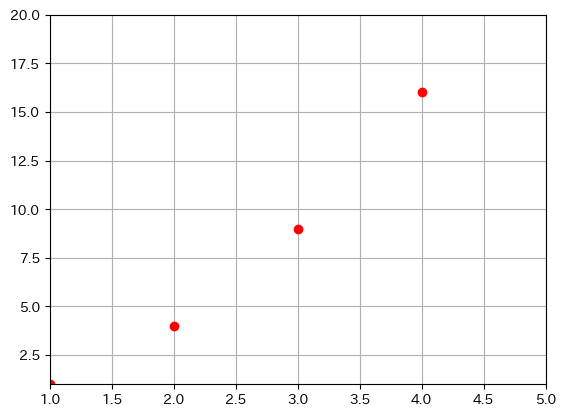

In [12]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([1, 5, 1, 20])
plt.grid()

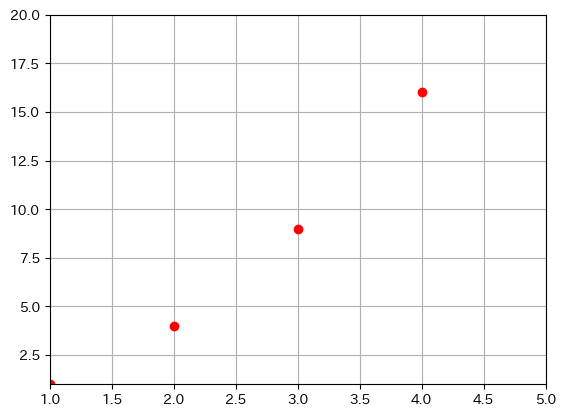

In [13]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.xlim(1, 5)
plt.ylim(1, 20)
plt.grid()


---

## 複数のグラフを作成  

Matplotlib 各機能の関係性  
- axis：軸(X軸、Y軸)  
- axes(英語の単語`axis`の複数形)：描画領域(1つのグラフ)  
- figure：描画領域の全体(図、複数のグラフを格納できる)  

![](./images/Figure.png)  

- figure(figsize=(幅, 高さ))：Figure(図)を作成  
  書かなくても自動生成(今までは、いきなりplot()を実行)  
  → フォーマットを指定する場合、figure()を使用する  

- 幅・高さの単位は「インチ」、dpiのデフォルト値は「100」  
  例）figsize=(9, 3)：9インチ×3インチ  
  → (9 × 100dpi) × (3 × 100dpi) = 900ピクセル × 300ピクセル  

- subplot(LMN)：複数のAxes(グラフ)を作成  
  引数：1桁の整数を3つ組み合わせたもの  
  例）132：1行3列のグラフを作成、うち左から2番目(真ん中の列)が対象  
  - L：行(縦の個数)  
  - M：列(横の個数)  
  - N：左上から右に数えて何番目の場所か → 1行目の列が終わったら2行目へ  

- グラフの種類  
  - bar：棒グラフ  
  - scatter：散布図  
  - plot：ノーマル(線グラフ)  

- suptitle()：図全体のタイトルを設定  


Text(0.5, 0.98, 'Categorical Plotting')

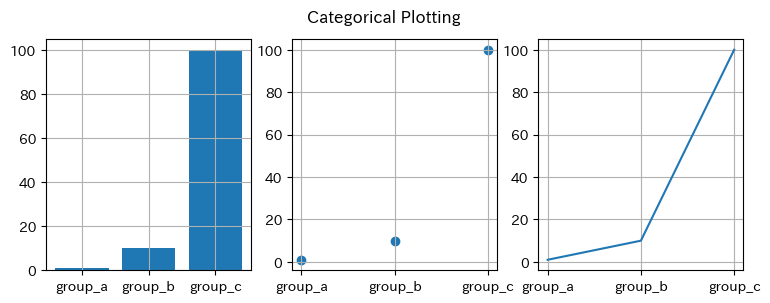

In [14]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.grid()

plt.subplot(132)
plt.scatter(names, values)
plt.grid()

plt.subplot(133)
plt.plot(names, values)
plt.grid()

plt.suptitle('Categorical Plotting')

複数のグラフを効率良く作成 → subplots()を使用  
`Figure(図), Axes(複数のグラフ) = plt.subplots(行数, 列数, squeeze=False, オプション)`  

- 複数のグラフを作成する場合、引数`squeeze=False`は設定しておく  
  → 行列数に関係なく、図の位置を二次元配列(axes[0,1])で指定できるようになる  
  例）1行3列のグラフを作成した場合、位置は一次元配列(axes[1])で書かないとエラーになる  

Text(0.5, 0.98, 'Categorical Plotting')

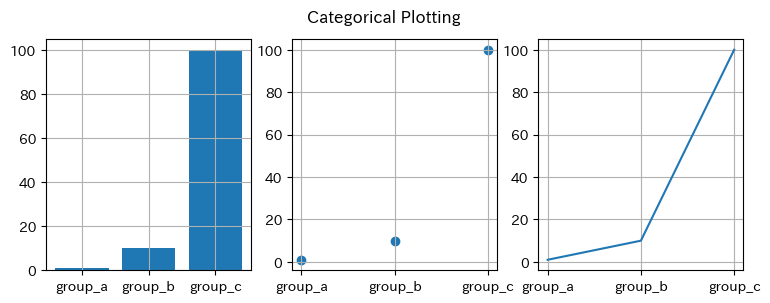

In [15]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

fig, ax = plt.subplots(1, 3, squeeze=False, figsize=(9, 3))

ax[0,0].bar(names, values)
ax[0,0].grid()

ax[0,1].scatter(names, values)
ax[0,1].grid()

ax[0,2].plot(names, values)
ax[0,2].grid()

plt.suptitle('Categorical Plotting')


---

## グラフ：Axes(ax)の表示を調整  

- X軸・Y軸の開始位置  
  - `set_xlim(開始,終了)`  
  - `set_ylim(開始,終了)`  


- 縦横比を合わせる：`set_aspect('equal')`  


- コメントを追加：`ax.text()`  
  元データのXY座標から表示位置をずらすため、`offset`を指定し加算  


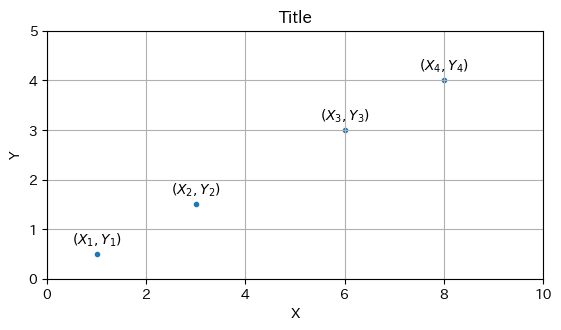

In [16]:
X = np.array([1., 3., 6., 8.,])
Y = np.array([0.5, 1.5, 3., 4.,])
offset = 0.2

fig, ax = plt.subplots()
ax.scatter(X, Y, marker='.')
for i, row in enumerate(X):
    ax.text(X[i], Y[i] + offset, f'$(X_{i+1}, Y_{i+1})$', ha='center')
ax.set_title('Title')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
ax.set_aspect('equal')
ax.grid()


---

## 円グラフ  

テストデータ  
- 1～5のランダムな数字：50件   

ランダムな数字 =  [3 1 2 5 1 3 3 3 3 4 2 5 2 3 4 1 4 1 4 3 5 1 2 3 5 5 5 4 5 4 3 4 2 1 2 2 3
 5 1 4 2 4 3 4 3 1 2 2 4 1]
ラベル =  [1 2 3 4 5]
件数 =  [ 9 10 12 11  8]


([<matplotlib.patches.Wedge at 0x7f918c8ba920>,
 [Text(0.5894094953465411, 0.928760704807937, '1'),
  Text(1.0805159646085447, -0.20611950472011673, '2'),
  Text(-5.149471629032507e-08, -1.0999999999999988, '3'),
  Text(-1.0913261750601648, -0.13786652831108245, '4'),
  Text(-0.5299290306818473, 0.9639373540021146, '5')],
 [Text(0.3214960883708406, 0.5065967480770565, '18.0%'),
  Text(0.5893723443319334, -0.1124288207564273, '20.0%'),
  Text(-2.8088027067450036e-08, -0.5999999999999993, '24.0%'),
  Text(-0.5952688227600899, -0.07519992453331768, '22.0%'),
  Text(-0.2890521985537349, 0.5257840112738806, '16.0%')])

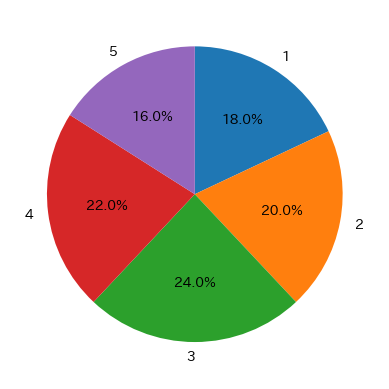

In [17]:
survay = np.random.randint(1, 6, 50)
answer, count = np.unique(survay, return_counts = True)
print('ランダムな数字 = ', survay)
print('ラベル = ', answer)
print('件数 = ', count)
plt.pie(count, labels=answer, counterclock=False, startangle=90, autopct="%1.1f%%")


---

## ヒストグラムと箱ひげ図  

テストデータ  
- 平均値：50  
- 標準偏差：10  
- データ数：100  

In [18]:
rng = np.random.default_rng()
r = rng.normal(50, 10, 100)

ヒストグラム  
- `hist()`  
  `bins`：表示する階層数  

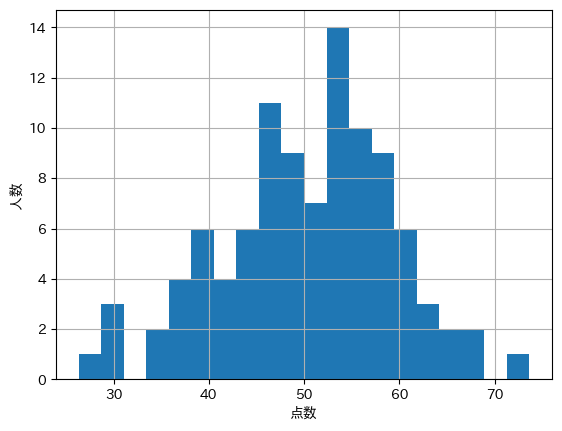

In [19]:
plt.hist(r, bins=20)
plt.xlabel('点数')
plt.ylabel('人数')
plt.grid()

箱ひげ図：ばらつきを四分位数で表す  
- `plt.boxplot()`  

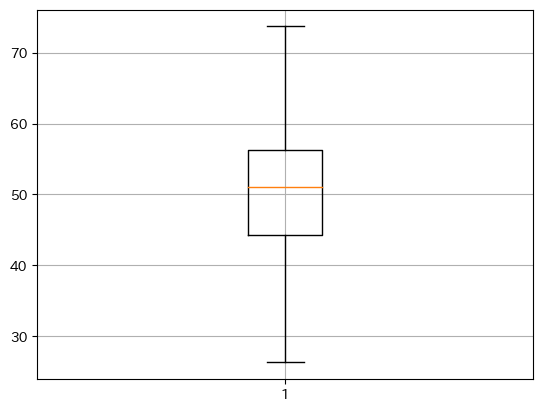

In [20]:
plt.boxplot(r)
plt.grid()


---

## 格子点とヒートマップ  

### 格子点  

面積に含まれるX,Yの整数  


In [21]:
x = np.arange(-4, 5)
y = np.arange(-4, 5)

X, Y = np.meshgrid(x, y)
X, Y

(array([[-4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-4, -3, -2, -1,  0,  1,  2,  3,  4]]),
 array([[-4, -4, -4, -4, -4, -4, -4, -4, -4],
        [-3, -3, -3, -3, -3, -3, -3, -3, -3],
        [-2, -2, -2, -2, -2, -2, -2, -2, -2],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2],
        [ 3,  3,  3,  3,  3,  3,  3,  3,  3],
        [ 4,  4,  4,  4,  4,  4,  4,  4,  4]]))

- 格子点を散布図で表すと、イメージしやすくなる  
  → グラフ(=四角形の面積)の中に、格子点が打たれる  

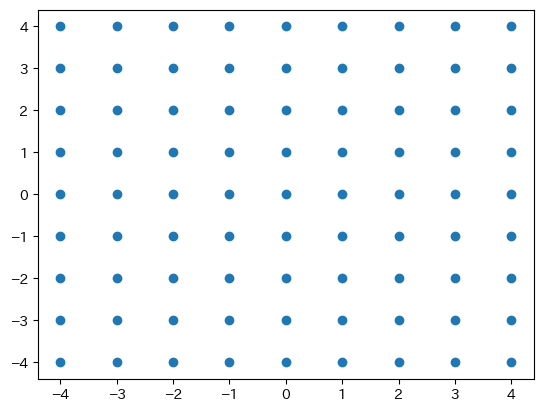

In [22]:
plt.scatter(X, Y)



### ヒートマップ  

データの数値を、強弱で色分ける  
＝ 等高線：高さや数値で線を区切ったり、色を変えて表示する  


例）  
- 地図の「高さ」  
- 天気図の「気圧」  


XとYの計算結果を線で区切る：`plt.contour()`  
→ 色が無いと分かりにくい  

Text(0, 0.5, 'Y')

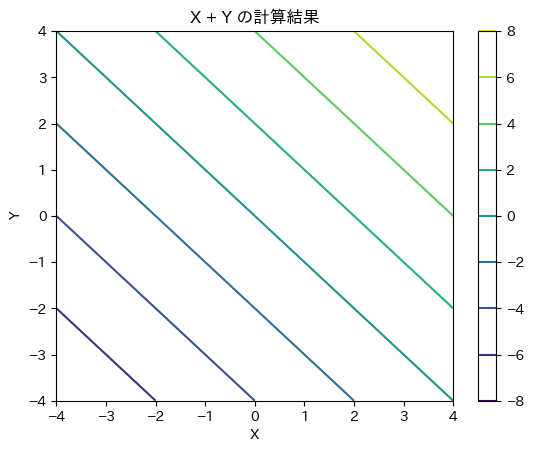

In [23]:
Z = X + Y

plt.contour(X, Y, Z)
plt.colorbar()
plt.title('X + Y の計算結果')
plt.xlabel('X')
plt.ylabel('Y')

XとYの計算結果を線で区切り、かつ色で表す：`plt.contourf()`  
→ 線と線の間の色が異なる  

- `X + Y`：X座標・Y座標の数字が大きくなるほど、合計値が増えて色も変わる  
  最小値：-8 (-4 + -4)、最大値：8 (4 + 4)  

Text(0, 0.5, 'Y')

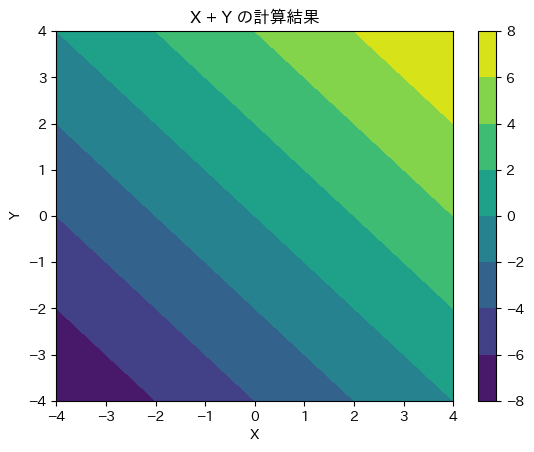

In [24]:
Z = X + Y

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('X + Y の計算結果')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

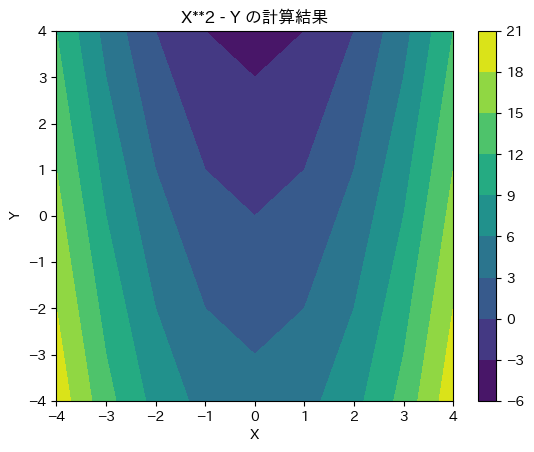

In [25]:
Z = X**2 - Y

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('X**2 - Y の計算結果')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

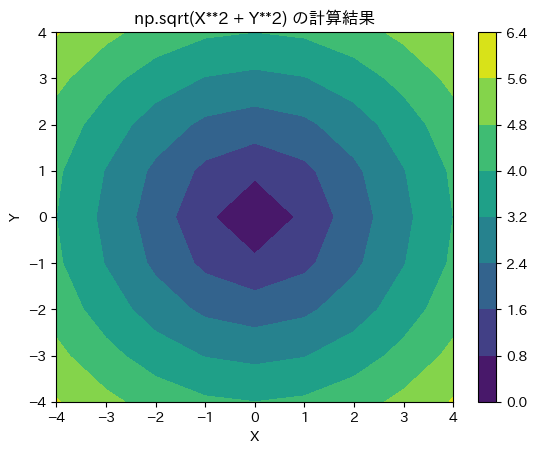

In [26]:
Z = np.sqrt(X**2 + Y**2)

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('np.sqrt(X**2 + Y**2) の計算結果')
plt.xlabel('X')
plt.ylabel('Y')

XとYの計算結果を線で区切る：`plt.contour()`  
さらに、色をメッシュ(格子)状に区切る：`plt.pcolormesh()`  　


- デフォルト値のメッシュ：粗い  


Text(0, 0.5, 'Y')

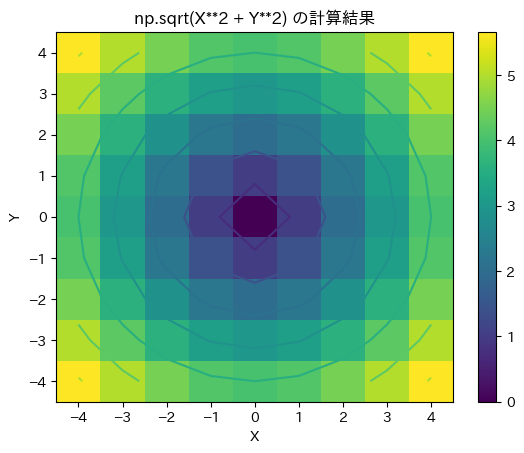

In [27]:
Z = np.sqrt(X**2 + Y**2)

plt.contour(X, Y, Z)
plt.pcolormesh(X, Y, Z)
plt.colorbar()
plt.title('np.sqrt(X**2 + Y**2) の計算結果')
plt.xlabel('X')
plt.ylabel('Y')

- メッシュのオプションを指定：`shading='gouraud'`  
  グーローシェーディングで滑らかになるが、等高線が無いと区切りが分かりにくい  

Text(0, 0.5, 'Y')

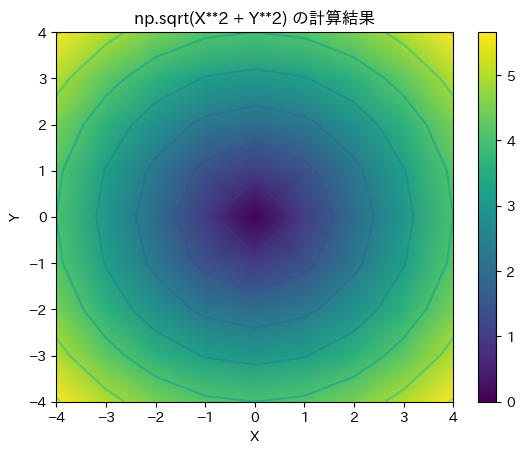

In [28]:
Z = np.sqrt(X**2 + Y**2)

plt.contour(X, Y, Z)
plt.pcolormesh(X, Y, Z, shading='gouraud')
plt.colorbar()
plt.title('np.sqrt(X**2 + Y**2) の計算結果')
plt.xlabel('X')
plt.ylabel('Y')


---

## アニメーション  

Jupyter Labの場合、HTMLに変換しないとアニメーションは動作しない  
Juypter Notebookの回避方法：`%matplotlib notebook`もNG  

- `matplotlib.animation.ArtistAnimation()`：リストへ1コマずつ格納し、アニメーション化  
- `matplotlib.animation.Animation.to_jshtml()` または `to_html5_video()`：アニメーションをHTMLに変換  
- `IPython.display.HTML()`：HTMLを出力  


In [29]:
X = np.array([0, 35])
artists = []

fig, ax = plt.subplots()
ax.set_xlabel('最高気温の月平均（℃）')
ax.set_ylabel('支出額（円）')
ax.set_xlim(0, 35)
ax.set_ylim(-250, 2000)
ax.grid()

# 1コマ目
artists.append(ax.plot(X, 15 * X + 500, ls='--', color='tab:red'))

# 2コマ目
artists.append(ax.plot(X, 25 * X + 250, ls='-.', color='tab:red'))

# 3コマ目
artists.append(ax.plot(X, 40 * X + 0, ls='dotted', color='tab:red'))

ani = matplotlib.animation.ArtistAnimation(fig, artists, interval=200)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)

- 1コマに複数の要素を表示  
  - artist = [要素1, 要素2, …] → 全体で1コマ  
    要素にリストが含まれているとエラーになる、例）[要素1, 要素2, [要素3, 要素4], …]  
  - artists = [artist1, artist2, …] → アニメーション  

In [30]:
A = np.linspace(0, 1, 3)
B = np.linspace(0, 6, 3)
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])

xmin, xmax = 0, 10
ymin, ymax = 0, 10
x = np.array([xmin, xmax])

artists = []
best = (None, None, None)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(D[:,0], D[:,1], c='red')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')
ax.grid()


for b in B:
    for a in A:
        artist = []

        # 要素：線グラフ
        # 複数の座標(=要素)を持ったリストのため、extendで追加 → []を取り除く
        artist.extend(ax.plot(x, a * x + b, 'red', ls='-'))

        # 要素：散布図との残差
        # 座標毎に1つずつ作成
        for i, row in enumerate(D):
            row_x, row_y = row
            y_hat = a * row_x + b
            ymin = min(row_y, y_hat)
            ymax = max(row_y, y_hat)
            artist.append(ax.vlines([row_x], ymin, ymax, linestyles='dashed', color='red', alpha=0.5))

        # 要素：コメント
        msr = ((D[:,1] - a * D[:,0] - b) ** 2).mean()
        if best[0] is None or msr < best[0]:
            best = (msr, a, b)
        msg1 = f"$a$ = {a:.2f}, $b$ = {b:.1f}: MSR = ${msr:.2f}$"
        msg2 = "(Current best: $a$ = {0[1]:.2f}, $b$ = {0[2]:.1f}: MSR = ${0[0]:.2f}$)".format(best)
        artist.append(ax.text(5, 0.6, msg1 + '\n' + msg2, color='black', ha='center'))

        # n個の要素を、1コマとして追加
        artists.append(artist)

ani = matplotlib.animation.ArtistAnimation(fig, artists, interval=200)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)


---
